In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [3]:
df = pd.read_csv('weather.csv')
df.head()

,Date,Home,Away,Home Score,Away Score,Venue,Weather (Degrees),Weather Type,Wind (MPH),Wind Direction
0,2014-03-22,D-backs,Dodgers,1,3,Sydney Cricket Ground,75,Overcast,5,Varies
1,2014-03-22,D-backs,Dodgers,5,7,Sydney Cricket Ground,79,Partly Cloudy,5,Varies
2,2014-03-30,Dodgers,Padres,1,3,Petco Park,67,Clear,11,L To R
3,2014-03-31,Cubs,Pirates,0,1,PNC Park,54,Sunny,2,Out To CF
4,2014-03-31,Royals,Tigers,3,4,Comerica Park,52,Sunny,4,In From CF


In [4]:
df = df[['Venue', 'Weather (Degrees)', 'Wind (MPH)']]
df = df.groupby('Venue').mean()
df = df.reset_index()
df.head()

,Venue,Weather (Degrees),Wind (MPH)
0,AT&T Park,63.983827,12.797844
1,Angel Stadium,74.318750,7.825000
2,Angel Stadium of Anaheim,75.812500,7.197917
3,BB&T Ballpark,75.666667,4.333333
4,Busch Stadium,78.168122,8.058952


In [5]:
park = pd.read_csv('park.csv')
park['YEAR'] = [i.replace('-01-01 00:00:00', '') for i in park['YEAR']]
park['YEAR'] = park['YEAR'].astype('int')
park = park[park['YEAR'] >= 2014]
park = park[['PARK NAME', 'RUNS', 'HR', 'H', '2B', '3B']]
park = park.groupby('PARK NAME').mean()
park = park.reset_index()
park.head()

,PARK NAME,RUNS,HR,H,2B,3B
0,Angel Stadium,0.937667,1.000667,0.963667,0.913333,0.673833
1,Busch Stadium,0.947333,0.876667,0.988167,0.974667,0.953333
2,Chase Field,1.112833,1.067833,1.058333,1.124500,1.792667
3,Citi Field,0.864167,0.954333,0.887667,0.865500,0.664167
4,Citizens Bank Park,0.994833,1.212000,0.980333,0.912333,0.884000


In [6]:
merge = pd.merge(left= park, right= df, left_on= 'PARK NAME', right_on= 'Venue')
merge = merge.drop(['Venue'], axis = 1)
merge.head()

,PARK NAME,RUNS,HR,H,2B,3B,Weather (Degrees),Wind (MPH)
0,Angel Stadium,0.937667,1.000667,0.963667,0.913333,0.673833,74.318750,7.825000
1,Busch Stadium,0.947333,0.876667,0.988167,0.974667,0.953333,78.168122,8.058952
2,Chase Field,1.112833,1.067833,1.058333,1.124500,1.792667,80.629712,2.815965
3,Citi Field,0.864167,0.954333,0.887667,0.865500,0.664167,72.772829,10.761693
4,Citizens Bank Park,0.994833,1.212000,0.980333,0.912333,0.884000,75.657080,8.993363


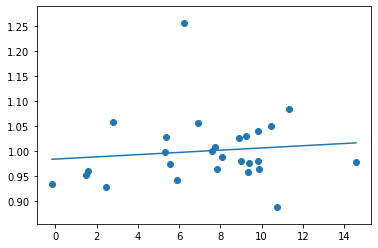

In [7]:
x = merge['Wind (MPH)']
y = merge['H']
plt.scatter(x, y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

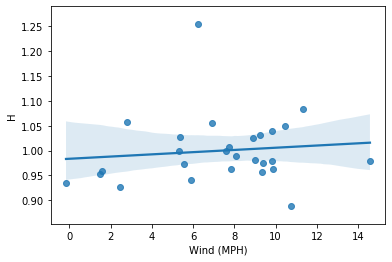

In [8]:
sns.regplot(x, y)

In [9]:
model = np.polyfit(x, y, 1)
model

array([0.00222493, 0.9835119 ])

In [10]:
model = sm.OLS(y, sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      H   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                    0.3167
Date:                Mon, 15 Jun 2020   Prob (F-statistic):              0.579
Time:                        14:55:17   Log-Likelihood:                 34.748
No. Observations:                  27   AIC:                            -65.50
Df Residuals:                      25   BIC:                            -62.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9835      0.032     30.914      0.000       0.918       1.049
Wind (MPH)     0.0022      0.004      0.563      0.579      -0.006       0.010
==============================================================================
Omnibus:                       26.466   Durbin-Watson:                   2.465
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.096
Skew:                           1.939   Prob(JB):                     1.09e-12
Kurtosis:                       8.825   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

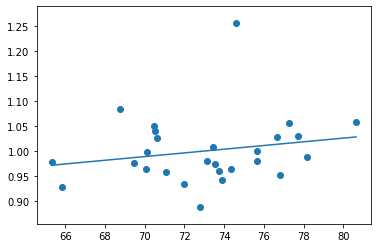

In [11]:
x = merge['Weather (Degrees)']
y = merge['H']
plt.scatter(x, y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

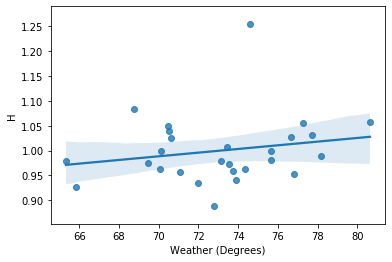

In [12]:
sns.regplot(x, y)

In [13]:
model = np.polyfit(x, y, 1)
model

array([0.0036938 , 0.72994952])

In [14]:
model = sm.OLS(y, sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      H   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.030
Date:                Mon, 15 Jun 2020   Prob (F-statistic):              0.320
Time:                        14:55:18   Log-Likelihood:                 35.123
No. Observations:                  27   AIC:                            -66.25
Df Residuals:                      25   BIC:                            -63.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7299      0.266      2.742      0.011       0.182       1.278
Weather (Degrees)     0.0037      0.004      1.015      0.320      -0.004       0.011
==============================================================================
Omnibus:                       25.189   Durbin-Watson:                   2.347
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.966
Skew:                           1.893   Prob(JB):                     3.84e-11
Kurtosis:                       8.320   Cond. No.                     1.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
x = merge[['Weather (Degrees)', 'Wind (MPH)']]
y = merge['H']
model = sm.OLS(y, sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      H   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.003
Date:                Mon, 15 Jun 2020   Prob (F-statistic):              0.382
Time:                        14:55:19   Log-Likelihood:                 35.662
No. Observations:                  27   AIC:                            -65.32
Df Residuals:                      24   BIC:                            -61.44
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6014      0.296      2.029      0.054      -0.010       1.213
Weather (Degrees)     0.0050      0.004      1.297      0.207      -0.003       0.013
Wind (MPH)            0.0041      0.004      0.989      0.333      -0.004       0.013
==============================================================================
Omnibus:                       27.759   Durbin-Watson:                   2.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.112
Skew:                           1.989   Prob(JB):                     1.97e-14
Kurtosis:                       9.346   Cond. No.                     1.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x, y = pd.DataFrame(merge, columns = ['Weather (Degrees)']), pd.DataFrame(merge, columns = ['H'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

regressor = RandomForestRegressor()
regressor.fit(x_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [23]:
predictions = regressor.predict(x_test)
predictions = [float(i) for i in predictions]
comparison = pd.DataFrame({"Real" : y_test.iloc[:,0], "Predictions" : predictions})
comparison = comparison.reset_index()
comparison = comparison.drop(['index'], axis=1)
comparison

,Real,Predictions
0,1.025667,1.037007
1,1.255333,0.955680
2,0.934500,0.922408
3,1.027167,0.974520
4,0.978167,0.978173
5,0.988167,1.027960


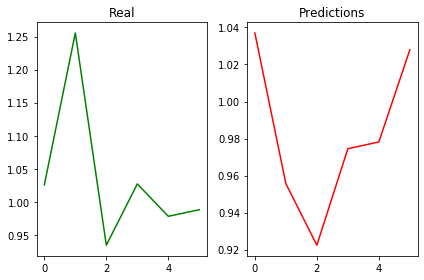

In [24]:
fig, (g1, g2) = plt.subplots(1, 2)
g1.plot(comparison.index, comparison["Real"], color = "Green")
g2.plot(comparison.index, comparison["Predictions"], color = "Red")
g1.set_title("Real")
g2.set_title("Predictions")
fig.tight_layout()
plt.show()

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x, y = pd.DataFrame(merge, columns = ['Wind (MPH)']), pd.DataFrame(merge, columns = ['H'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

regressor = RandomForestRegressor()
regressor.fit(x_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [26]:
predictions = regressor.predict(x_test)
predictions = [float(i) for i in predictions]
comparison = pd.DataFrame({"Real" : y_test.iloc[:,0], "Predictions" : predictions})
comparison = comparison.reset_index()
comparison = comparison.drop(['index'], axis=1)
comparison

,Real,Predictions
0,0.978167,1.041967
1,0.934500,0.953402
2,0.998500,1.039547
3,0.941000,1.163413
4,1.049500,0.921857
5,1.008000,0.978652


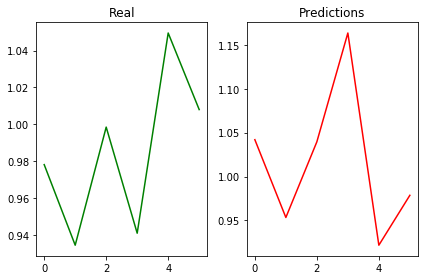

In [28]:
fig, (g1, g2) = plt.subplots(1, 2)
g1.plot(comparison.index, comparison["Real"], color = "Green")
g2.plot(comparison.index, comparison["Predictions"], color = "Red")
g1.set_title("Real")
g2.set_title("Predictions")
fig.tight_layout()
plt.show()

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x, y = pd.DataFrame(merge, columns = ['Weather (Degrees)', 'Wind (MPH)']), pd.DataFrame(merge, columns = ['H'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

regressor = RandomForestRegressor()
regressor.fit(x_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [30]:
predictions = regressor.predict(x_test)
predictions = [float(i) for i in predictions]
comparison = pd.DataFrame({"Real" : y_test.iloc[:,0], "Predictions" : predictions})
comparison = comparison.reset_index()
comparison = comparison.drop(['index'], axis=1)
comparison

,Real,Predictions
0,0.959667,0.946197
1,0.952000,0.978613
2,1.008000,0.967568
3,1.055333,0.993992
4,1.027167,0.982513
5,1.255333,0.953740


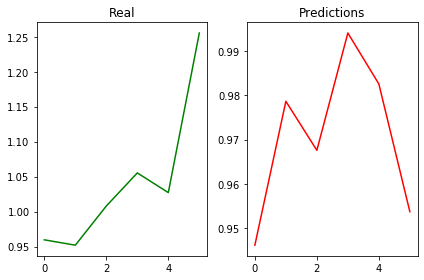

In [31]:
fig, (g1, g2) = plt.subplots(1, 2)
g1.plot(comparison.index, comparison["Real"], color = "Green")
g2.plot(comparison.index, comparison["Predictions"], color = "Red")
g1.set_title("Real")
g2.set_title("Predictions")
fig.tight_layout()
plt.show()